# NYC Property Sales Price Predictions

Note: We will add our problem statement and project description (target variable, features, etc.) here.

In [1]:
#These are the packages we are importing for our analysis.

import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import math
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

#https://www.python-course.eu/Regression_Trees.php
#Import the regression tree model
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

     |████████████████████████████████| 993kB 2.8MB/s 


In [2]:
link = 'https://drive.google.com/open?id=147GTGRGGQIcmJKe9Zd--qej05HAoJoX8'
fluff, id = link.split('=')
print (id)

147GTGRGGQIcmJKe9Zd--qej05HAoJoX8


In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('nyc-rolling-sales.csv')  
df = pd.read_csv('nyc-rolling-sales.csv')

In [4]:
df

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
5,9,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,405,16,,C4,516 EAST 12TH STREET,,10009,20,0,20,2581,9730,1900,2,C4,-,2017-07-20 00:00:00
6,10,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,,10009,8,0,8,1750,4226,1920,2,C4,3192840,2016-09-23 00:00:00
7,11,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,407,18,,C7,520 EAST 14TH STREET,,10009,44,2,46,5163,21007,1900,2,C7,-,2017-07-20 00:00:00
8,12,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,379,34,,D5,141 AVENUE D,,10009,15,0,15,1534,9198,1920,2,D5,-,2017-06-20 00:00:00
9,13,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,,D9,629 EAST 5TH STREET,,10009,24,0,24,4489,18523,1920,2,D9,16232000,2016-11-07 00:00:00


## In the cells below we focus on cleaning up the data for our analysis.

In [5]:
df = df.drop(df.columns[0],axis = 1)
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [0]:
df.rename(columns={'BUILDING CLASS AT PRESENT': 'BUILDINGCLASSPRESENT', 'APARTMENT NUMBER': 'APARTMENTNUMBER', 'ZIP CODE': 'ZIPCODE', 'RESIDENTIAL UNITS': 'RESIDENTIALUNITS', 'COMMERCIAL UNITS': 'COMMERCIALUNITS', 'TOTAL UNITS': 'TOTALUNITS', 'LAND SQUARE FEET': 'LANDSQUAREFEET', 'GROSS SQUARE FEET': 'GROSSSQUAREFEET', 'YEAR BUILT': 'YEARBUILT', 'TAX CLASS AT TIME OF SALE': 'TAXCLASSTIMEOFSALE', 'BUILDING CLASS AT TIME OF SALE': 'BUILDINGCLASSTIMEOFSALE', 'SALE PRICE': 'SALEPRICE', 'SALE DATE': 'SALEDATE', 'BUILDING CLASS CATEGORY': 'BUILDINGCLASSCATEGORY','TAX CLASS AT PRESENT': 'TAXCLASSATPRESENT'}, inplace=True)

In [7]:
df["BUILDINGCLASSCATEGORYTRUNC"] = df["BUILDINGCLASSCATEGORY"].str[:2]
df.BUILDINGCLASSCATEGORYTRUNC = pd.to_numeric(df.BUILDINGCLASSCATEGORYTRUNC,errors='coerce')
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDINGCLASSCATEGORY,TAXCLASSATPRESENT,BLOCK,LOT,EASE-MENT,BUILDINGCLASSPRESENT,ADDRESS,APARTMENTNUMBER,ZIPCODE,RESIDENTIALUNITS,COMMERCIALUNITS,TOTALUNITS,LANDSQUAREFEET,GROSSSQUAREFEET,YEARBUILT,TAXCLASSTIMEOFSALE,BUILDINGCLASSTIMEOFSALE,SALEPRICE,SALEDATE,BUILDINGCLASSCATEGORYTRUNC
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00,7
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00,7
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00,7
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00,7
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00,7


In [8]:
df = df[~(df['BUILDINGCLASSCATEGORYTRUNC'] > 20)]
df.shape

(78263, 22)

In [9]:
df = df[df.SALEPRICE != " -  "]
df.shape

(65732, 22)

In [10]:
df.SALEPRICE = pd.to_numeric(df.SALEPRICE,errors='coerce')
df = df[~(df['SALEPRICE'] < 1000000)]
df = df[~(df['SALEPRICE'] > 10000000)]
df.shape

(13613, 22)

In [0]:
df['AVGPRICEBOROUGH'] = df.groupby([pd.Grouper(key='BOROUGH')])['SALEPRICE'].transform('mean')
df['AVGPRICEZIPCODE'] = df.groupby([pd.Grouper(key='ZIPCODE')])['SALEPRICE'].transform('mean')
df['AVGPRICEBLOCK'] = df.groupby([pd.Grouper(key='BLOCK')])['SALEPRICE'].transform('mean')

In [12]:
df['LN_PRICE'] = np.log(df['SALEPRICE'])
df

,BOROUGH,NEIGHBORHOOD,BUILDINGCLASSCATEGORY,TAXCLASSATPRESENT,BLOCK,LOT,EASE-MENT,BUILDINGCLASSPRESENT,ADDRESS,APARTMENTNUMBER,ZIPCODE,RESIDENTIALUNITS,COMMERCIALUNITS,TOTALUNITS,LANDSQUAREFEET,GROSSSQUAREFEET,YEARBUILT,TAXCLASSTIMEOFSALE,BUILDINGCLASSTIMEOFSALE,SALEPRICE,SALEDATE,BUILDINGCLASSCATEGORYTRUNC,AVGPRICEBOROUGH,AVGPRICEZIPCODE,AVGPRICEBLOCK,LN_PRICE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00,7,2.803604e+06,2.146802e+06,6.625000e+06,15.706361
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00,7,2.803604e+06,2.146802e+06,1.762698e+06,15.185745
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00,7,2.803604e+06,2.146802e+06,5.200000e+06,15.894952
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,,10009,8,0,8,1750,4226,1920,2,C4,3192840,2016-09-23 00:00:00,7,2.803604e+06,2.146802e+06,1.986608e+06,14.976421
27,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2C,377,54,,C6,"267 EAST 7 ST, 4",,10009,0,0,0,-,-,1920,2,C6,1400000,2017-08-04 00:00:00,9,2.803604e+06,2.146802e+06,2.225000e+06,14.151983
40,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,391,57,,C6,"303 EAST 8TH STREET, 3F",,10009,0,0,0,-,-,1900,2,C6,1500000,2017-03-17 00:00:00,9,2.803604e+06,2.146802e+06,3.092857e+06,14.220976
62,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2C,402,47,,C6,"537 EAST 6TH STREET, 5",,10009,0,0,0,-,-,1900,2,C6,1475000,2017-05-03 00:00:00,9,2.803604e+06,2.146802e+06,1.762698e+06,14.204169
67,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2C,404,57,,C6,"297 EAST 10TH STREET, 2",,10009,0,0,0,-,-,1925,2,C6,2400000,2016-09-12 00:00:00,9,2.803604e+06,2.146802e+06,5.200000e+06,14.690979
71,1,ALPHABET CITY,10 COOPS - ELEVATOR APARTMENTS,2,386,36,,D0,"300 EAST 4TH STREET, 1D",,10009,0,0,0,-,-,1940,2,D0,1400000,2017-05-11 00:00:00,10,2.803604e+06,2.146802e+06,1.400000e+06,14.151983
74,1,ALPHABET CITY,11A CONDO-RENTALS,,394,1602,,,183-189 AVENUE B,,0,0,0,0,-,-,0,2,RR,8058923,2017-08-09 00:00:00,11,2.803604e+06,3.349967e+06,4.702974e+06,15.902290


## Here we converted the variables for each feature into columns with binary variables using get_dummies.

In [13]:
df = pd.get_dummies(df, columns=['ZIPCODE','BOROUGH','NEIGHBORHOOD','BUILDINGCLASSCATEGORY','TAXCLASSATPRESENT','BUILDINGCLASSPRESENT','YEARBUILT','TAXCLASSTIMEOFSALE','BUILDINGCLASSTIMEOFSALE'])
df.head()

,BLOCK,LOT,EASE-MENT,ADDRESS,APARTMENTNUMBER,RESIDENTIALUNITS,COMMERCIALUNITS,TOTALUNITS,LANDSQUAREFEET,GROSSSQUAREFEET,SALEPRICE,SALEDATE,BUILDINGCLASSCATEGORYTRUNC,AVGPRICEBOROUGH,AVGPRICEZIPCODE,AVGPRICEBLOCK,LN_PRICE,ZIPCODE_0,ZIPCODE_10001,ZIPCODE_10002,ZIPCODE_10003,ZIPCODE_10004,ZIPCODE_10005,ZIPCODE_10006,ZIPCODE_10007,ZIPCODE_10009,ZIPCODE_10010,ZIPCODE_10011,ZIPCODE_10012,ZIPCODE_10013,ZIPCODE_10014,ZIPCODE_10016,ZIPCODE_10017,ZIPCODE_10018,ZIPCODE_10019,ZIPCODE_10021,ZIPCODE_10022,ZIPCODE_10023,ZIPCODE_10024,ZIPCODE_10025,...,BUILDINGCLASSTIMEOFSALE_B1,BUILDINGCLASSTIMEOFSALE_B2,BUILDINGCLASSTIMEOFSALE_B3,BUILDINGCLASSTIMEOFSALE_B9,BUILDINGCLASSTIMEOFSALE_C0,BUILDINGCLASSTIMEOFSALE_C1,BUILDINGCLASSTIMEOFSALE_C2,BUILDINGCLASSTIMEOFSALE_C3,BUILDINGCLASSTIMEOFSALE_C4,BUILDINGCLASSTIMEOFSALE_C5,BUILDINGCLASSTIMEOFSALE_C6,BUILDINGCLASSTIMEOFSALE_C7,BUILDINGCLASSTIMEOFSALE_C8,BUILDINGCLASSTIMEOFSALE_C9,BUILDINGCLASSTIMEOFSALE_D0,BUILDINGCLASSTIMEOFSALE_D1,BUILDINGCLASSTIMEOFSALE_D2,BUILDINGCLASSTIMEOFSALE_D3,BUILDINGCLASSTIMEOFSALE_D4,BUILDINGCLASSTIMEOFSALE_D5,BUILDINGCLASSTIMEOFSALE_D6,BUILDINGCLASSTIMEOFSALE_D7,BUILDINGCLASSTIMEOFSALE_D9,BUILDINGCLASSTIMEOFSALE_G0,BUILDINGCLASSTIMEOFSALE_R1,BUILDINGCLASSTIMEOFSALE_R2,BUILDINGCLASSTIMEOFSALE_R3,BUILDINGCLASSTIMEOFSALE_R4,BUILDINGCLASSTIMEOFSALE_R6,BUILDINGCLASSTIMEOFSALE_R8,BUILDINGCLASSTIMEOFSALE_R9,BUILDINGCLASSTIMEOFSALE_RR,BUILDINGCLASSTIMEOFSALE_S1,BUILDINGCLASSTIMEOFSALE_S2,BUILDINGCLASSTIMEOFSALE_S3,BUILDINGCLASSTIMEOFSALE_S4,BUILDINGCLASSTIMEOFSALE_S5,BUILDINGCLASSTIMEOFSALE_S9,BUILDINGCLASSTIMEOFSALE_V0,BUILDINGCLASSTIMEOFSALE_Z0
0,392,6,,153 AVENUE B,,5,0,5,1633,6440,6625000,2017-07-19 00:00:00,7,2.803604e+06,2.146802e+06,6.625000e+06,15.706361,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,402,21,,154 EAST 7TH STREET,,10,0,10,2272,6794,3936272,2016-09-23 00:00:00,7,2.803604e+06,2.146802e+06,1.762698e+06,15.185745,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,404,55,,301 EAST 10TH STREET,,6,0,6,2369,4615,8000000,2016-11-17 00:00:00,7,2.803604e+06,2.146802e+06,5.200000e+06,15.894952,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,406,32,,210 AVENUE B,,8,0,8,1750,4226,3192840,2016-09-23 00:00:00,7,2.803604e+06,2.146802e+06,1.986608e+06,14.976421,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27,377,54,,"267 EAST 7 ST, 4",,0,0,0,-,-,1400000,2017-08-04 00:00:00,9,2.803604e+06,2.146802e+06,2.225000e+06,14.151983,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Decision Tree Regressor Model

In [0]:
X = df[df.columns.difference(['BLOCK', 'LOT', 'EASE-MENT', 'ADDRESS', 'APARTMENTNUMBER', 'SALEPRICE', 'SALEDATE', 'BUILDINGCLASSCATEGORYTRUNC', 'LANDSQUAREFEET', 'GROSSSQUAREFEET', 'AVGPRICEBOROUGH', 'AVGPRICEZIPCODE', 'LN_PRICE'])]
Y = df['SALEPRICE']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=42)


regression_model = DecisionTreeRegressor(criterion="mse",max_depth=5)

#Fit the model
regression_model.fit(X_train,Y_train)

#Predict unseen query instances
predicted = regression_model.predict(X_test)


In [15]:
errors = abs(predicted - Y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'dollars.')

Mean Absolute Error: 754225.84 dollars.


In [0]:
mape = 100 * (errors / Y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 66.85 %.


In [0]:
errors_relative = abs(predicted - Y_test)/Y_test
print('Mean Relative Error:', round(np.mean(errors_relative), 2)*100, 'percent.')

Mean Relative Error: 33.0 percent.


In [0]:
errors_relative_5 = errors_relative

for i in enumerate(errors_relative, start=1):
  if errors_relative[i] >= .05:
    errors_relative_5[i] = 1
  else:
    errors_relative_5[i] = 0

print('Probability of errors > 5%:', round(np.mean(errors_relative_5), 2)*100, 'percent.')


errors_relative_10 = errors_relative

for i in range(len(errors_relative)):
  if errors_relative[i] >= .1:
    errors_relative_10[i] = 1
  else:
    errors_relative_10[i] = 0

print('Probability of errors > 10%:', round(np.mean(errors_relative_10), 2)*100, 'percent.')

errors_relative_20 = errors_relative

for i in range(len(errors_relative)):
  if errors_relative[i] >= .2:
    errors_relative_20[i] = 1
  else:
    errors_relative_20[i] = 0

print('Probability of errors > 20%:', round(np.mean(errors_relative_20), 2)*100, 'percent.')

errors_relative_90 = errors_relative

for i in range(len(errors_relative)):
  if errors_relative[i] >= .9:
    errors_relative_90[i] = 1
  else:
    errors_relative_90[i] = 0

print('Probability of errors > 90%:', round(np.mean(errors_relative_90), 2)*100, 'percent.')

KeyError: ignored

In [0]:
regression_model = DecisionTreeRegressor(criterion="mse",max_depth=7)

#Fit the model
regression_model.fit(X_train,Y_train)

#Predict unseen query instances
predicted = regression_model.predict(X_test)

errors = abs(predicted - Y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'dollars.')

mape = 100 * (errors / Y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 737497.35 dollars.
Accuracy: 67.9 %.


In [0]:
regression_model = DecisionTreeRegressor(criterion="mse",max_depth=6)

#Fit the model
regression_model.fit(X_train,Y_train)

#Predict unseen query instances
predicted = regression_model.predict(X_test)

errors = abs(predicted - Y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'dollars.')

mape = 100 * (errors / Y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 744544.77 dollars.
Accuracy: 67.43 %.


In [0]:
regression_model = DecisionTreeRegressor(criterion="mse",max_depth=10)

#Fit the model
regression_model.fit(X_train,Y_train)

#Predict unseen query instances
predicted = regression_model.predict(X_test)

errors = abs(predicted - Y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'dollars.')

mape = 100 * (errors / Y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 729687.39 dollars.
Accuracy: 68.55 %.


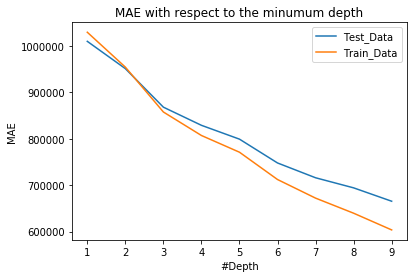

In [0]:
fig = plt.figure()
ax0 = fig.add_subplot(111) 
MAE_train = []
MAE_test = []
for i in range(1,10):
    #Paramterize the model and let i be the number of minimum instances per leaf node
    regression_model = DecisionTreeRegressor(criterion="mse",max_depth=i)   
    #Train the model
    regression_model.fit(X_train,Y_train)
    #Predict query instances
    predicted_train = regression_model.predict(X_train)
    predicted_test = regression_model.predict(X_test)
    #Calculate and append the MAEs
    errors_train = abs(predicted_train - Y_train)
    errors_test = abs(predicted_test - Y_test)
    MAE_train.append(round(np.mean(errors_train), 2))
    MAE_test.append(round(np.mean(errors_test), 2))
   
ax0.plot(range(1,10),MAE_test,label='Test_Data')
ax0.plot(range(1,10),MAE_train,label='Train_Data')
ax0.legend()
ax0.set_title('MAE with respect to the minumum depth')
ax0.set_xlabel('#Depth')
ax0.set_ylabel('MAE')
plt.show()